# 1 -  Import Libraries

## 1.1 - Setup
First, we import a few common modules.

In [1]:
print('-'*30)
import sys 
print("Python version: {}". format(sys.version))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib.__version__))

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

import warnings
warnings.filterwarnings('ignore')
print('-'*30)

------------------------------
Python version: 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy version: 1.18.1
pandas version: 1.0.1
matplotlib version: 3.1.3
scikit-learn version: 0.22.1
------------------------------


## 1.2 - Modelling Libraries

In [2]:
#Visualization
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
#import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.plotting import scatter_matrix


#Common Model Helpers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn. compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, accuracy_score

#Common Model Algorithms
from sklearn import linear_model, svm, ensemble, tree
from xgboost import XGBClassifier


# 2 - Quick look to the data structure

 - We have 891 rows and 12 columns (attributes) on the training data. 
 - We have 418 rows and 11 columns (attributes) on the test data. 
 - The *Survived*, *PassengerId*, *Pclass*, *Age*, *SibSp*, *Parch* and *Fare* attributes are numerical datatype.
     - The *Survived* attribute is our target attribute: 1=survived and 0 = succumbed
     - The *PassengerId* attribute is a random identifier. It has no impact on our target attribut. So, it will be exluded from analysis.
     - The *Pclass* attribute is categorical attribute. It is an (indirect) indicator of socio-economic status : 1 = Upper, 2 = Middle and 3 = Lower. 
     - The *Age* attribte is self explanatory. There is 177 missing values in the training data and 86 missing values in the test data. This represente 20% of our data set. W'll have to choose a strategy in order to complete this missing values. 
     - The *SibSp* attribut  indicate the number of siblings / spouses aboard the Titanic.
     - The *Parch* attribute indicate the nimber of parents / children aboard the Titanic.
     - The *SibSp* and  *Parch* combined can indicate the family size of each passenger. 
     - The *Fare* attribute indicate the passenger fare for the trip! The is only one missing value on the test data. 
 - The *Name*, *Sex*, *Ticket* and *Embarked* attributes are textual (object) datatype.
     - The *Name* attribte is self explanatory. From the title, we can extract the gender or the socio-economic status (Master, Dr, etc.)
     - The *Sex* attribte is self explanatory.
     - The *Ticket* can be assumed as random variable.  So, as for the *PassengerId*, it will be excluded from analysis.
     - The *Cabin* attribute has 687 (327) missing values in the training data (test data). Which represent 77% of the data set! So, this attribute will be excluded from analysis. 
     - The *Embarked* attribute indicate the port of embarkation. There is only 2 missing values in training data. 

## 2.1 - Load the data

In [3]:
#load the data
data_train = pd.read_csv('./kaggle/input/titanic/train.csv')
data_test  = pd.read_csv('./kaggle/input/titanic/test.csv')
data_all = pd.concat([data_train, data_test])

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.2 - Quick look to the data

### 2.2.1 - The training dataset

In [5]:
#Quick look to the  data
print('(row,columns) =', data_train.shape)
data_train.head()

(row,columns) = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.2.1 - The test dataset

In [8]:
#Quick look to the  data
print('(row,columns) =', data_test.shape)
data_test.head()

(row,columns) = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 3 - Exploratory data analysis

# 3.1 - Looking for Correlations 

In [11]:
# Descriptive statistics summary
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 75% of passengers were under 38.
- The fare was less than 31 for 75% of the passengers

In [12]:
correlations = data_train.corr()

In [13]:
correlations['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

- Strong positve correlation between Fare and Survived attributes
- Strong negative correlation between Pclass and Survived attributes

In [14]:
def get_grouped(group_by='Sex', hue='Survived', df_data=None, normalize=False):
    df = df_data.groupby(group_by)[hue].value_counts(normalize=normalize)
    if normalize:
        df = df.mul(100)
        df = df.rename('Percentage').reset_index()
    else:
        df = df.rename('Passengers').reset_index()
    return df

def plot_annotate(axis, sufix=False):
    for patches in axis.patches:
        txt = str(int(patches.get_height().round()))
        if sufix:
            txt += ' %'
        x = patches.get_x() + patches.get_width()/2
        y = patches.get_height()
        axis.text(x,y,txt, ha='center')

def plot_grouped(group_by='Sex', hue='Survived', df_data=None, axis_index=None, anotate=True):
    df_gr = get_grouped(group_by, hue, df_data, False)
    df_gr_nr = get_grouped(group_by, hue, df_data, True)
    
    sns.barplot(x= group_by, y='Passengers', hue =hue, ci=None, data= df_gr,ax=axis_index[0])
    sns.barplot(x= group_by, y='Percentage', hue =hue, ci=None, data= df_gr_nr,ax=axis_index[1])
    sns.pointplot(x= group_by, y='Percentage', hue =hue, ci=None, data= df_gr_nr,ax=axis_index[2])
    
    axis_index[0].set_ylim(0,500)
    axis_index[1].set_ylim(0,100)
    axis_index[2].set_ylim(0,100)
    
    if anotate:
        plot_annotate(axis_index[0])
        plot_annotate(axis_index[1], True)
    

In [15]:
print('Sex:')
print(data_train['Sex'].value_counts(normalize=True))
print('-'*30)
print('Pclass:')
print(data_train['Pclass'].value_counts(normalize=True))
print('-'*30)
print('Embarked:')
print(data_train['Embarked'].value_counts(normalize=True))

Sex:
male      0.647587
female    0.352413
Name: Sex, dtype: float64
------------------------------
Pclass:
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
------------------------------
Embarked:
S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64


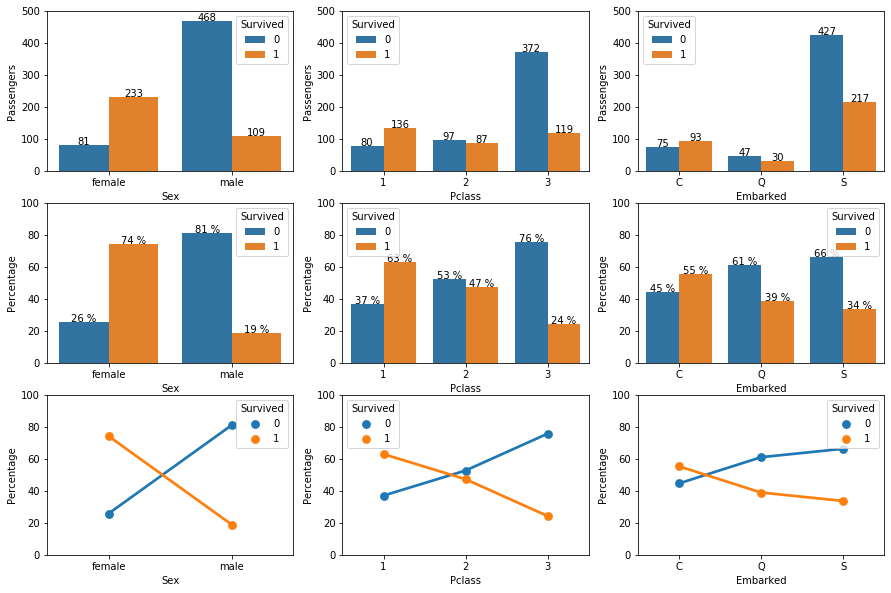

In [16]:
fig, axis = plt.subplots(3, 3, figsize=(15,10))
plot_grouped('Sex','Survived', data_train, axis[:,0])
plot_grouped('Pclass','Survived', data_train, axis[:,1])
plot_grouped('Embarked', 'Survived', data_train, axis[:,2])

- *Sex*:
    - Female passengers seem more likely to survive (74%) than men (19%)
    - 64% of passengers were man
- *Pcalss*
    - Class 3 passengers seem more likely to succumb (76%) than class 1 (35%)and class 2 (53%) passengers. 
    - 55% of passengers have a class 3 ticket.
- *Embarked*
    - Passengers who boarded through gate C seem been more likely to survive.
    - 18 % of passenger boarded by port C (72% for port S and 8% for port Q)

# 3.2 - Feature engineering


### Get *Title* from *Name* :

In [17]:
data_all['Title']=data_all['Name'].map(lambda name:name.split(',')[1].split('.')[0].replace(' ',''))
print(data_all['Title'].drop_duplicates().values.tolist())
data_all['Title'].value_counts()

['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'theCountess', 'Jonkheer', 'Dona']


Mr             757
Miss           260
Mrs            197
Master          61
Rev              8
Dr               8
Col              4
Mlle             2
Ms               2
Major            2
Mme              1
Jonkheer         1
theCountess      1
Don              1
Lady             1
Dona             1
Sir              1
Capt             1
Name: Title, dtype: int64

In [18]:
title_dic = {
    'Mr':'Mr',
    'Miss':'Miss',
    'Mrs':'Mrs',
    'Master':'Master',
    'Dr':'Officer',
    'Rev':'Officer',
    'Col':'Officer',
    'Ms':'Mr',
    'Mlle':'Miss',
    'Major':'Officer',
    'Sir':'Royalty',
    'Capt':'Officer',
    'Lady':'Royalty',
    'theCountess':'Royalty',
    'Don':'Royalty',
    'Jonkheer':'Royalty',
    'Mme':'Miss',
    'Dona':'Royalty'
}


In [19]:
data_all['Title'] = data_all['Title'].map(title_dic)
data_all['Title'].value_counts()

Mr         759
Miss       263
Mrs        197
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64

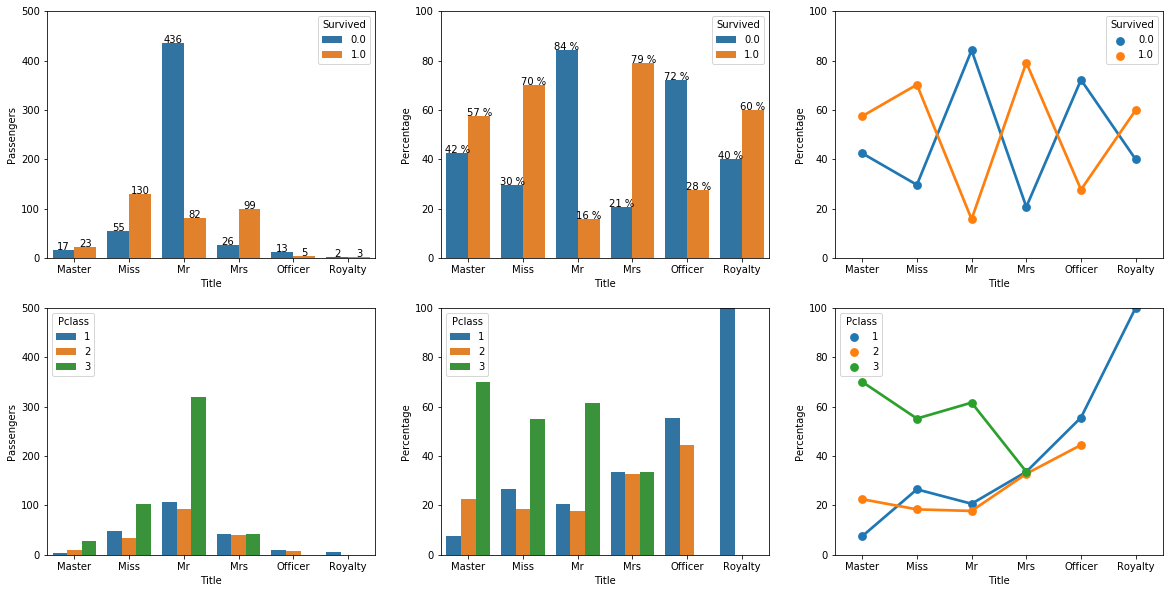

In [20]:
fig, axis = plt.subplots(2, 3, figsize=(20,10))
plot_grouped('Title','Survived', data_all.iloc[:891], axis[0,:])
plot_grouped('Title','Pclass', data_all.iloc[:891].dropna(subset=['Pclass']), axis[1,:], False)

- Miss and Mrs (Female) seem more likely to survive.
- Royalty passengers  seem more likely to survive but they were only 5 ! 
- Master seem more likely to survive comapre to the majority of calsse 3 passengers ! 

In [21]:
data_all.groupby('Title')['Sex'].value_counts(normalize=True)

Title    Sex   
Master   male      1.000000
Miss     female    1.000000
Mr       male      0.997365
         female    0.002635
Mrs      female    1.000000
Officer  male      0.956522
         female    0.043478
Royalty  female    0.500000
         male      0.500000
Name: Sex, dtype: float64

### Get *AgeCat* from *Age* :

In [22]:
data_all['AgeCat'] = pd.cut(data_all['Age'], 
                               bins=[0., 10, 30, np.inf], labels=['child','young adult', 'adult'])
data_all['AgeCat'] = pd.cut(data_all['Age'], 
                               bins=[0., 10, 30, np.inf], labels=[1, 2, 3])
data_all['AgeCat'].value_counts()

2    523
3    437
1     86
Name: AgeCat, dtype: int64

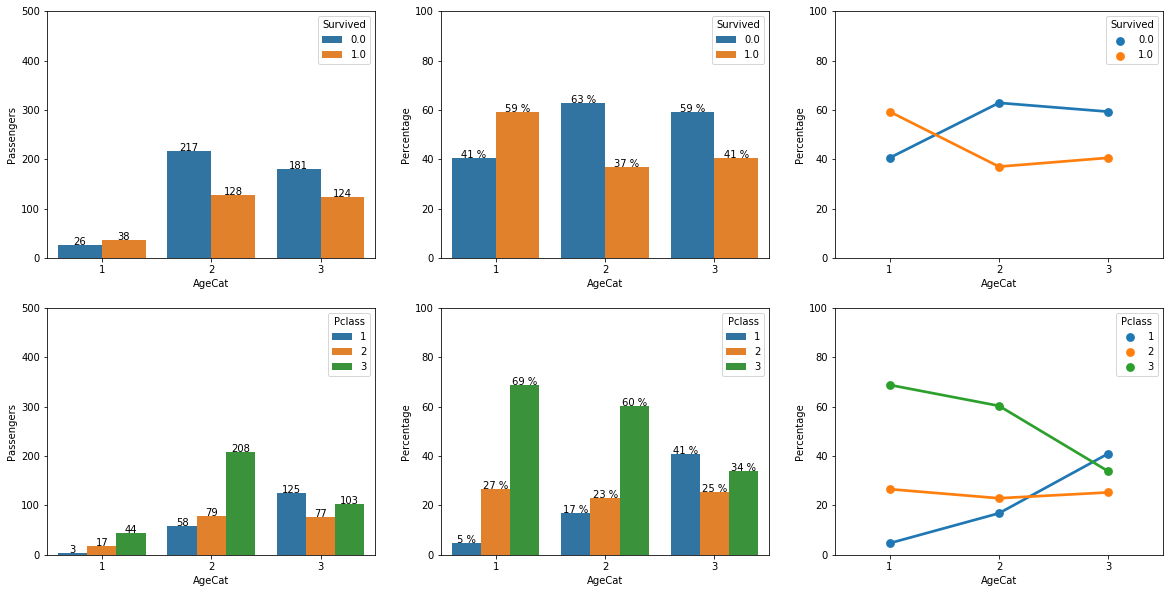

In [23]:
fig, axis = plt.subplots(2, 3, figsize=(20,10))
plot_grouped('AgeCat','Survived', data_all.iloc[:891], axis[0,:])
plot_grouped('AgeCat','Pclass', data_all.iloc[:891], axis[1,:])

- children seem more likely to survive.

### Get *FamilySize* and *IsAlone*  from *SibSp* and Parch :

In [24]:
data_all['FamilySize'] = data_all['SibSp']+ data_all['Parch'] + 1
data_all['FamilyCat'] = pd.cut(data_all['FamilySize'], 
                               bins=[0., 1, 4, np.inf], labels=['No Family','Medimum Family', 'Big Family'])
data_all['FamilyCat'] = pd.cut(data_all['FamilySize'], 
                               bins=[0., 1, 4, np.inf], labels=[1, 2, 3])
data_all['IsAlone']=1
data_all['IsAlone'].loc[data_all['FamilySize']>1]=0

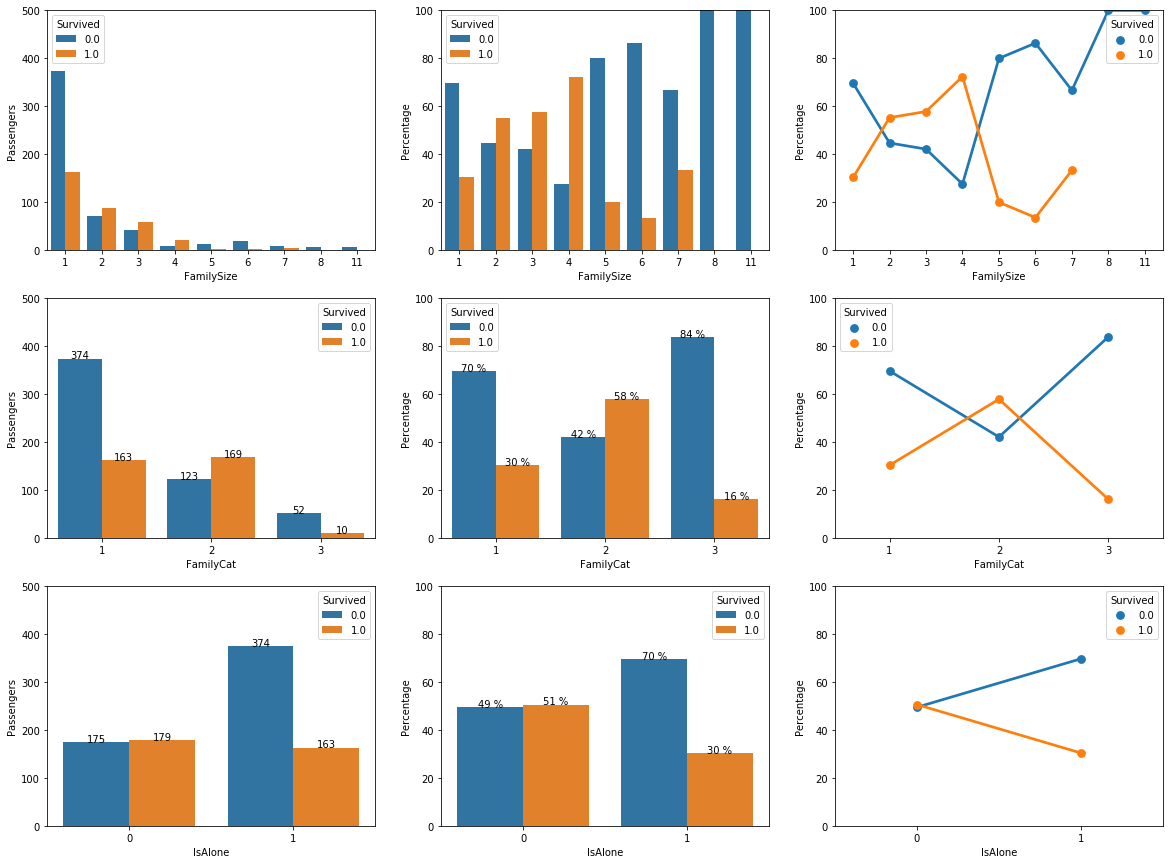

In [25]:
fig, axis = plt.subplots(3, 3, figsize=(20,15))
plot_grouped('FamilySize','Survived', data_all.iloc[:891], axis[0,:],False)
plot_grouped('FamilyCat','Survived', data_all.iloc[:891], axis[1,:],True)
plot_grouped('IsAlone','Survived', data_all.iloc[:891], axis[2,:],True)

- Passengers with no family (alone) or with a big family seem more likely to succumb 

### Get *FareCat* from *Fare*

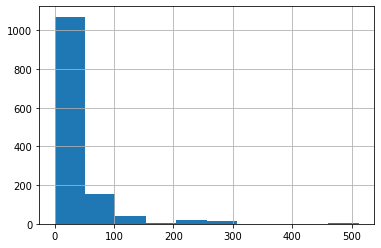

In [26]:
data_all['Fare'].hist()

In [27]:
data_all.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [28]:
data_all['FareBand'] = pd.qcut(data_all['Fare'], 4)
data_all.groupby('FareBand')['Survived'].mean()


FareBand
(-0.001, 7.896]      0.197309
(7.896, 14.454]      0.303571
(14.454, 31.275]     0.441048
(31.275, 512.329]    0.600000
Name: Survived, dtype: float64

In [29]:
data_all['FareCat'] = pd.cut(data_all['Fare'], 
                               bins=[-1, 07.896, 14.454, 31.275, np.inf], labels=[0, 1, 2, 3])
data_all['FareCat'].value_counts()

2    338
0    337
3    323
1    310
Name: FareCat, dtype: int64

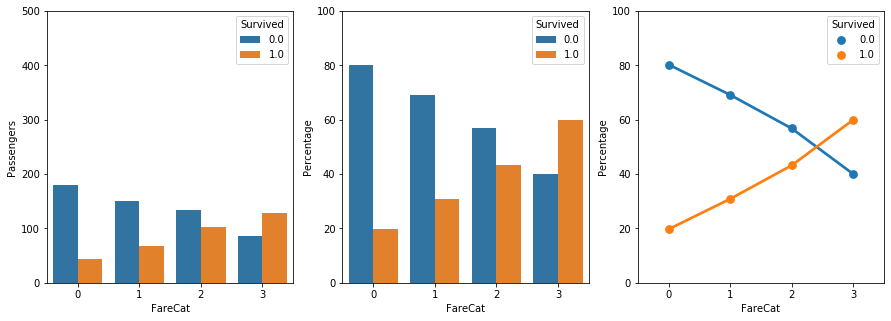

In [30]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))
plot_grouped('FareCat','Survived', data_all.iloc[:891], axis[:],False)

In [31]:
data_all.groupby('FareCat')['Fare'].max()

FareCat
0      7.8958
1     14.4000
2     31.2750
3    512.3292
Name: Fare, dtype: float64

In [32]:
data_all['FareCat'].isna().sum()

1

# 4 - Prepare the data for ML algorithms

## 4.1 - Data Cleaning : *Age* attribute

In [33]:
median_age_cat= data_all.groupby(['Title','Sex'])['Age'].median().reset_index()
median_age_cat = median_age_cat[['Title','Sex','Age']]
median_age_cat

,Title,Sex,Age
0,Master,male,4.0
1,Miss,female,22.0
2,Mr,female,28.0
3,Mr,male,29.0
4,Mrs,female,35.5
5,Officer,female,49.0
6,Officer,male,50.0
7,Royalty,female,39.0
8,Royalty,male,40.0


In [34]:
def fill_age(row):
    cond = ((median_age_cat['Sex'] == row['Sex']) & (median_age_cat['Title'] == row['Title']))
    return median_age_cat[cond]['Age'].values[0]

data_all['Age'] = data_all.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

In [35]:
#Update AgeCat 
data_all['AgeCat'] = pd.cut(data_all['Age'], 
                               bins=[0., 10, 30, np.inf], labels=['child','young adult', 'adult'])
data_all['AgeCat'] = pd.cut(data_all['Age'], 
                               bins=[0., 10, 30, np.inf], labels=[1, 2, 3])


In [36]:
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat,FamilySize,FamilyCat,IsAlone,FareBand,FareCat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,2,2,0,"(-0.001, 7.896]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,2,0,"(31.275, 512.329]",3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,1,1,"(7.896, 14.454]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,2,0,"(31.275, 512.329]",3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,1,1,1,"(7.896, 14.454]",1


In [37]:
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCat,FamilySize,FamilyCat,IsAlone,FareBand,FareCat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,2,2,0,"(-0.001, 7.896]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,3,2,2,0,"(31.275, 512.329]",3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,2,1,1,1,"(7.896, 14.454]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,3,2,2,0,"(31.275, 512.329]",3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,1,1,1,"(7.896, 14.454]",1


## 4.2 Data transformation

In [38]:
titanic_all = data_all.drop(['Name','PassengerId','Cabin','Ticket','FareBand'], axis=1)
titanic_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeCat,FamilySize,FamilyCat,IsAlone,FareCat
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2,2,2,0,0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,3,2,2,0,3
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,2,1,1,1,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,3,2,2,0,3
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,3,1,1,1,1


In [39]:
num_features=['Pclass','FamilySize', 'IsAlone','FareCat','AgeCat','FamilyCat']
#cat_features=['Sex','Embarked', 'Title','AgeCat','FamilyCat', 'FareCat']
cat_features =['Sex','Embarked', 'Title']
sel_features = num_features + cat_features
titanic = titanic_all.iloc[:891].drop(['Survived'],axis=1)[sel_features].copy()
titanic_labels = titanic_all.iloc[:891]['Survived'].astype(int).copy()
titanic_test = titanic_all.iloc[891:].drop(['Survived'],axis=1)[sel_features].copy()

In [40]:
len(sel_features)

9

In [41]:
num_pipeline = Pipeline([
    ('inputer',SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('inputer',SimpleImputer(strategy="most_frequent")),
    ('Encoder', OneHotEncoder())])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [42]:
titanic_prepared = full_pipeline.fit_transform(titanic)
titanic_test_prepared = full_pipeline.transform(titanic_test)

# 5 - Modeling 

In [43]:
MLA = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators=10, max_features=12, random_state=42),
    #GLM
    linear_model.SGDClassifier(),
    linear_model.LogisticRegression(),
    #SVM
    svm.SVC(probability=True),
    #xgboost
    XGBClassifier(),
    #Trees    
    tree.DecisionTreeClassifier()
]

In [44]:
sel_estimators =[]
for clf in MLA:
    sel_estimators.append((clf.__class__.__name__,clf))
voting_clf = ensemble.VotingClassifier(estimators=sel_estimators, voting='hard')

for clf in (MLA+[voting_clf]):
    clf.fit(titanic_prepared, titanic_labels)
    score = cross_val_score(clf, titanic_prepared, titanic_labels, scoring='accuracy', cv =3)
    print(clf.__class__.__name__,':', score.mean())
    

GradientBoostingClassifier : 0.8181818181818182
RandomForestClassifier : 0.8092031425364757
SGDClassifier : 0.7328843995510662
LogisticRegression : 0.8148148148148149
SVC : 0.8282828282828283
XGBClassifier : 0.8237934904601572
DecisionTreeClassifier : 0.8002244668911335
VotingClassifier : 0.8226711560044894


In [45]:
titanic_test_predictions = voting_clf.predict(titanic_test_prepared)

In [46]:
#svm_clf = svm.SVC(probability=True)
#svm_clf.fit(titanic_prepared, titanic_labels)
#titanic_test_predictions = svm_clf.predict(titanic_test_prepared)

In [47]:
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': titanic_test_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
